In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("Diwali Sales Data.csv", encoding="unicode escape")

In [7]:

##in order to delete columns, we specify axis as 1
df.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


## retrieving exact value count for categories

Age Group
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: count, dtype: int64


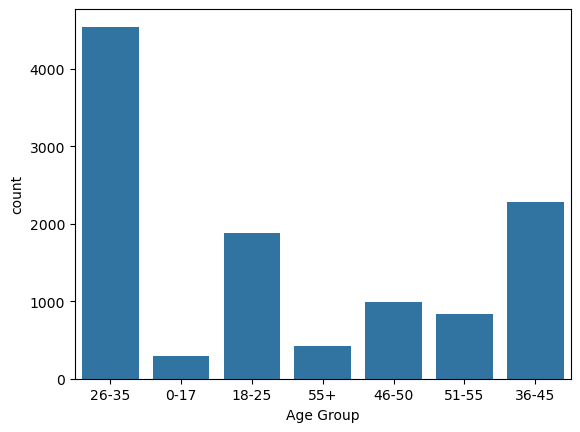

In [16]:
sns.countplot(data=df, x="Age Group")
print(df["Age Group"].value_counts())

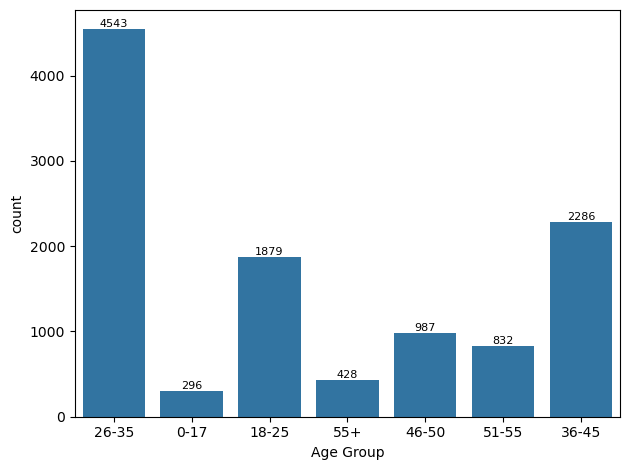

In [22]:
graph= sns.countplot(data=df, x="Age Group")

for bar in graph.patches:
    count=int(bar.get_height())
    x=bar.get_x()+ bar.get_width()/2
    y=bar.get_height()
    graph.text(x, y, count, ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

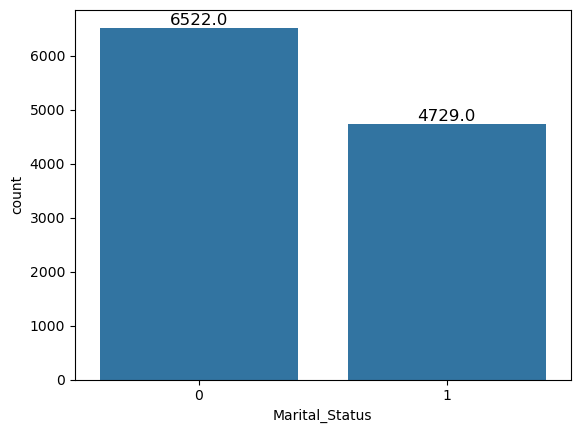

In [34]:
graph=sns.countplot(data=df, x="Marital_Status")

for bar in graph.patches:
    count=bar.get_height()
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    graph.text(x,y,count, ha="center", va="bottom",fontsize=12)

## hue plot with labels and count values

In [39]:
sns.set(rc={"figure.figsize":(25, 10)})

Occupation       Gender
Agriculture      F          203
                 M           80
Automobile       F          392
                 M          174
Aviation         F          932
                 M          378
Banking          F          825
                 M          314
Chemical         F          379
                 M          163
Construction     F          300
                 M          114
Food Processing  F          295
                 M          128
Govt             F          605
                 M          249
Healthcare       F          968
                 M          440
Hospitality      F          469
                 M          236
IT Sector        F         1075
                 M          513
Lawyer           F          364
                 M          167
Media            F          428
                 M          209
Retail           F          370
                 M          131
Textile          F          237
                 M          113
dtype: int64


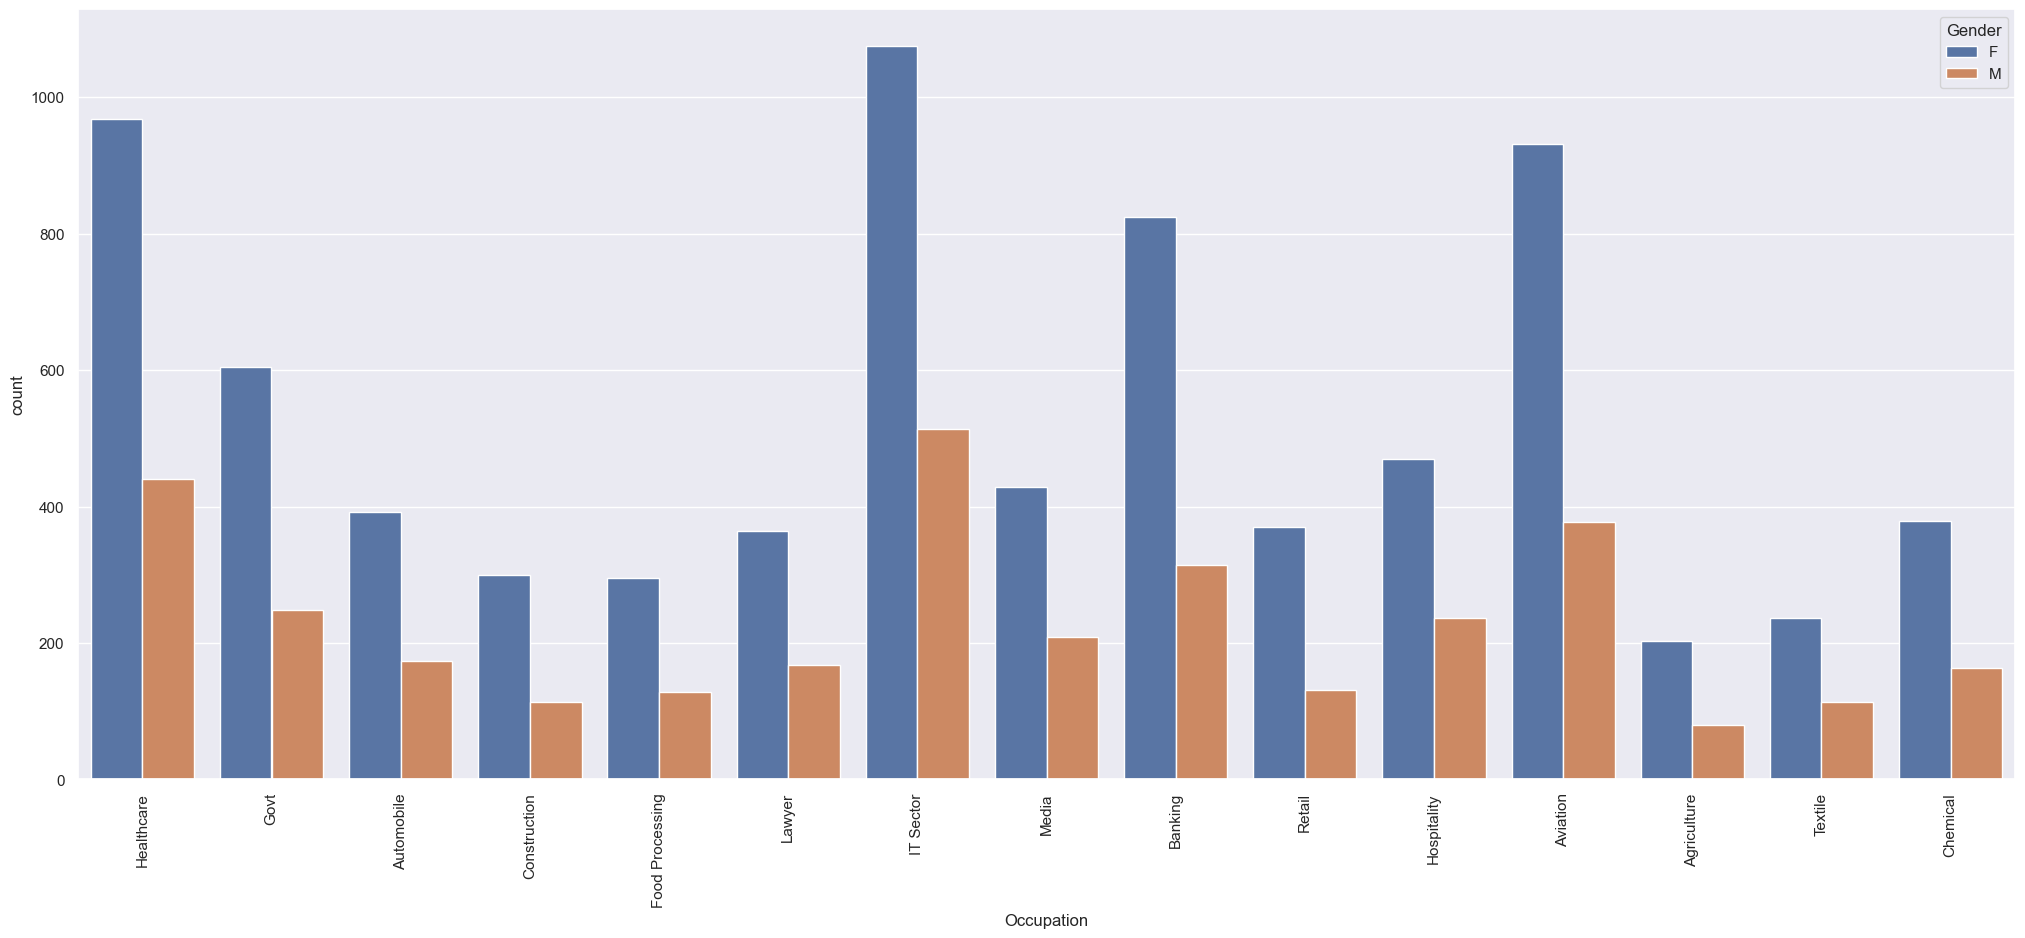

In [47]:
sns.countplot(data=df, x="Occupation", hue="Gender")
plt.xticks(rotation=90)

print(df.groupby(["Occupation", "Gender"]).size())
plt.show()

Gender              F    M
Occupation                
Agriculture       203   80
Automobile        392  174
Aviation          932  378
Banking           825  314
Chemical          379  163
Construction      300  114
Food Processing   295  128
Govt              605  249
Healthcare        968  440
Hospitality       469  236
IT Sector        1075  513
Lawyer            364  167
Media             428  209
Retail            370  131
Textile           237  113


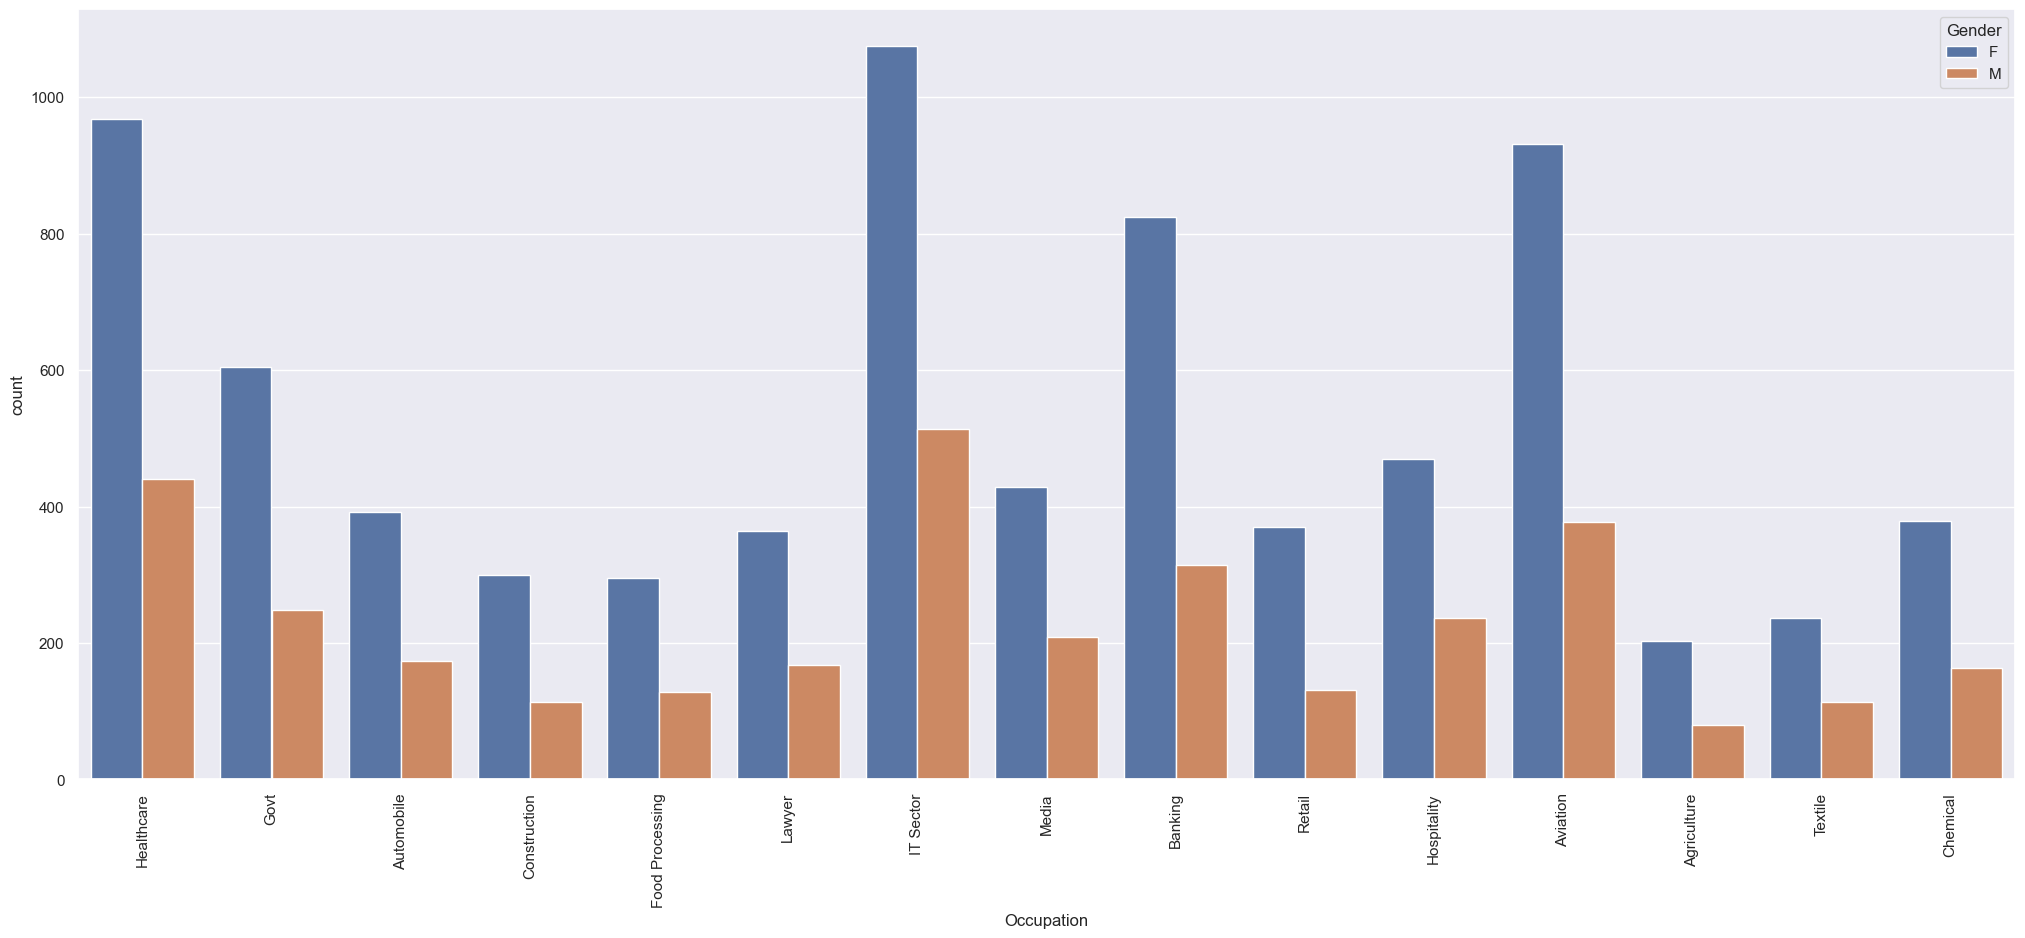

In [49]:
sns.countplot(data=df, x="Occupation", hue="Gender")
plt.xticks(rotation=90)

print(df.groupby(["Occupation", "Gender"]).size().unstack(fill_value=0))
plt.show()

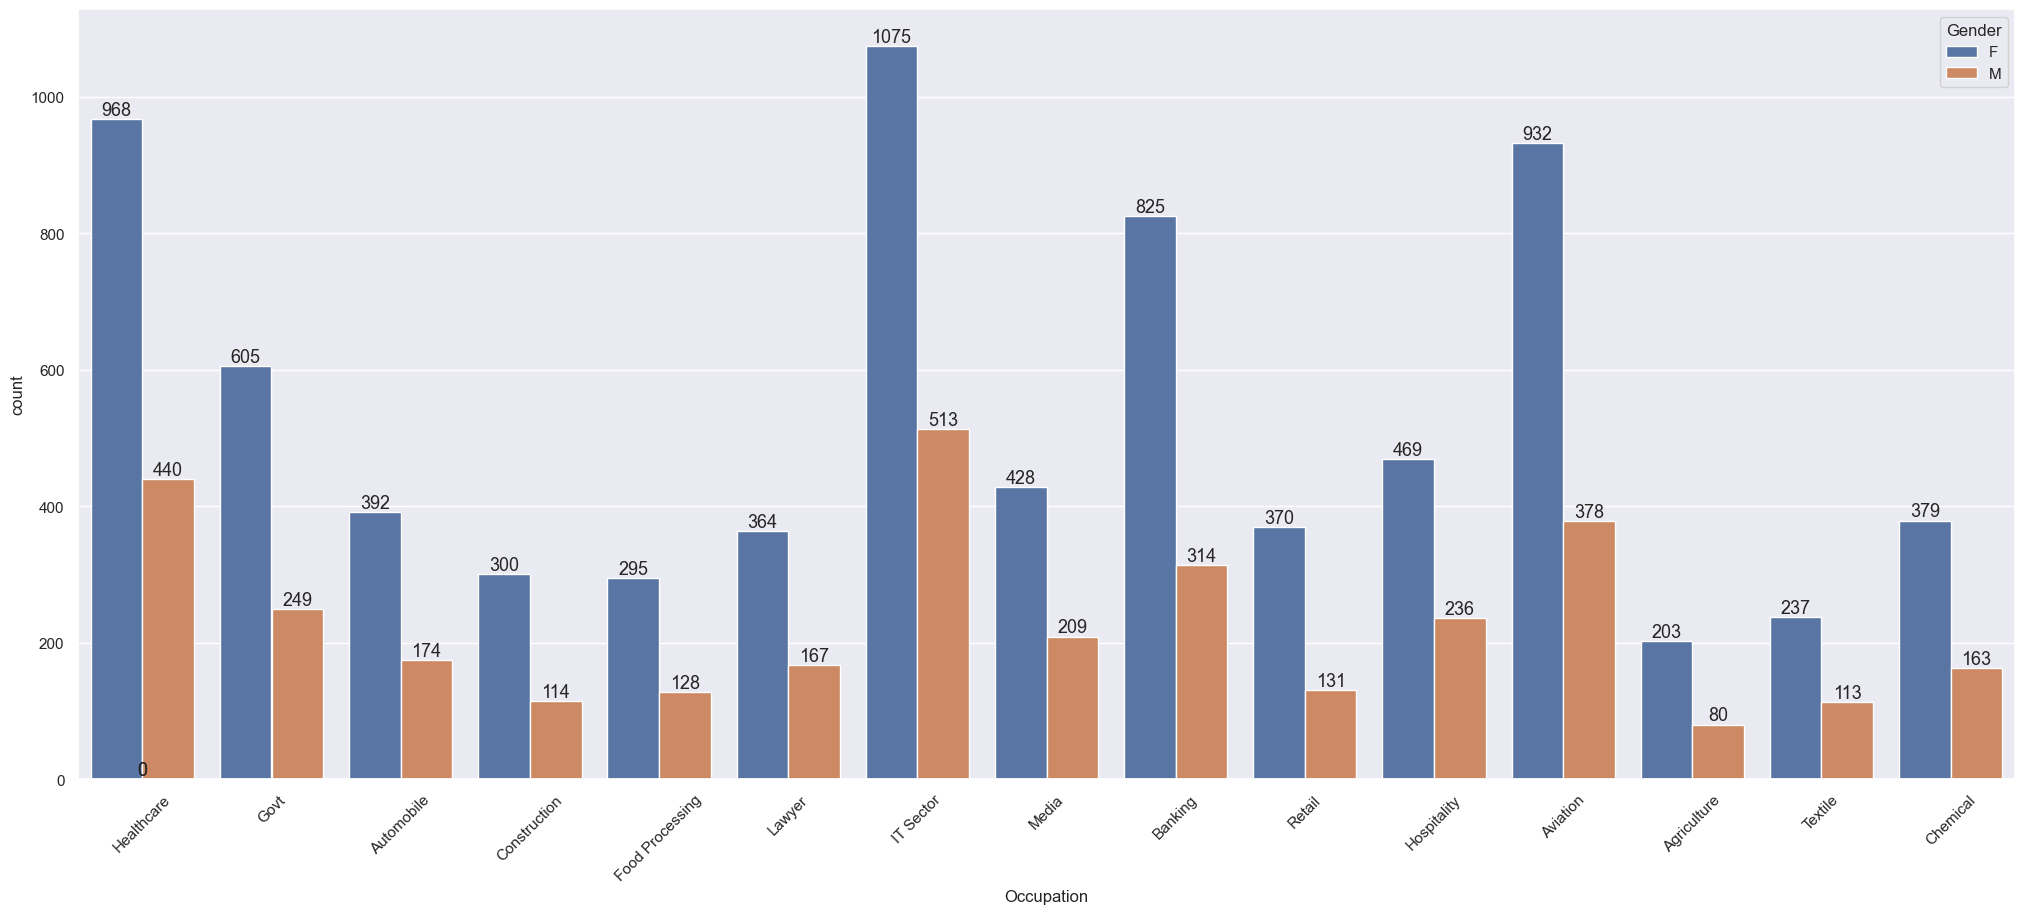

In [55]:
graph=sns.countplot(data=df, x="Occupation", hue="Gender")
for bar in graph.patches:
    count=int(bar.get_height())
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    graph.text(x,y,count, ha="center", va="bottom", fontsize=13)

plt.xticks(rotation=45)
plt.show()

In [57]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [63]:
sales=df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

In [65]:
sales.head()

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00


<Axes: xlabel='Occupation', ylabel='Amount'>

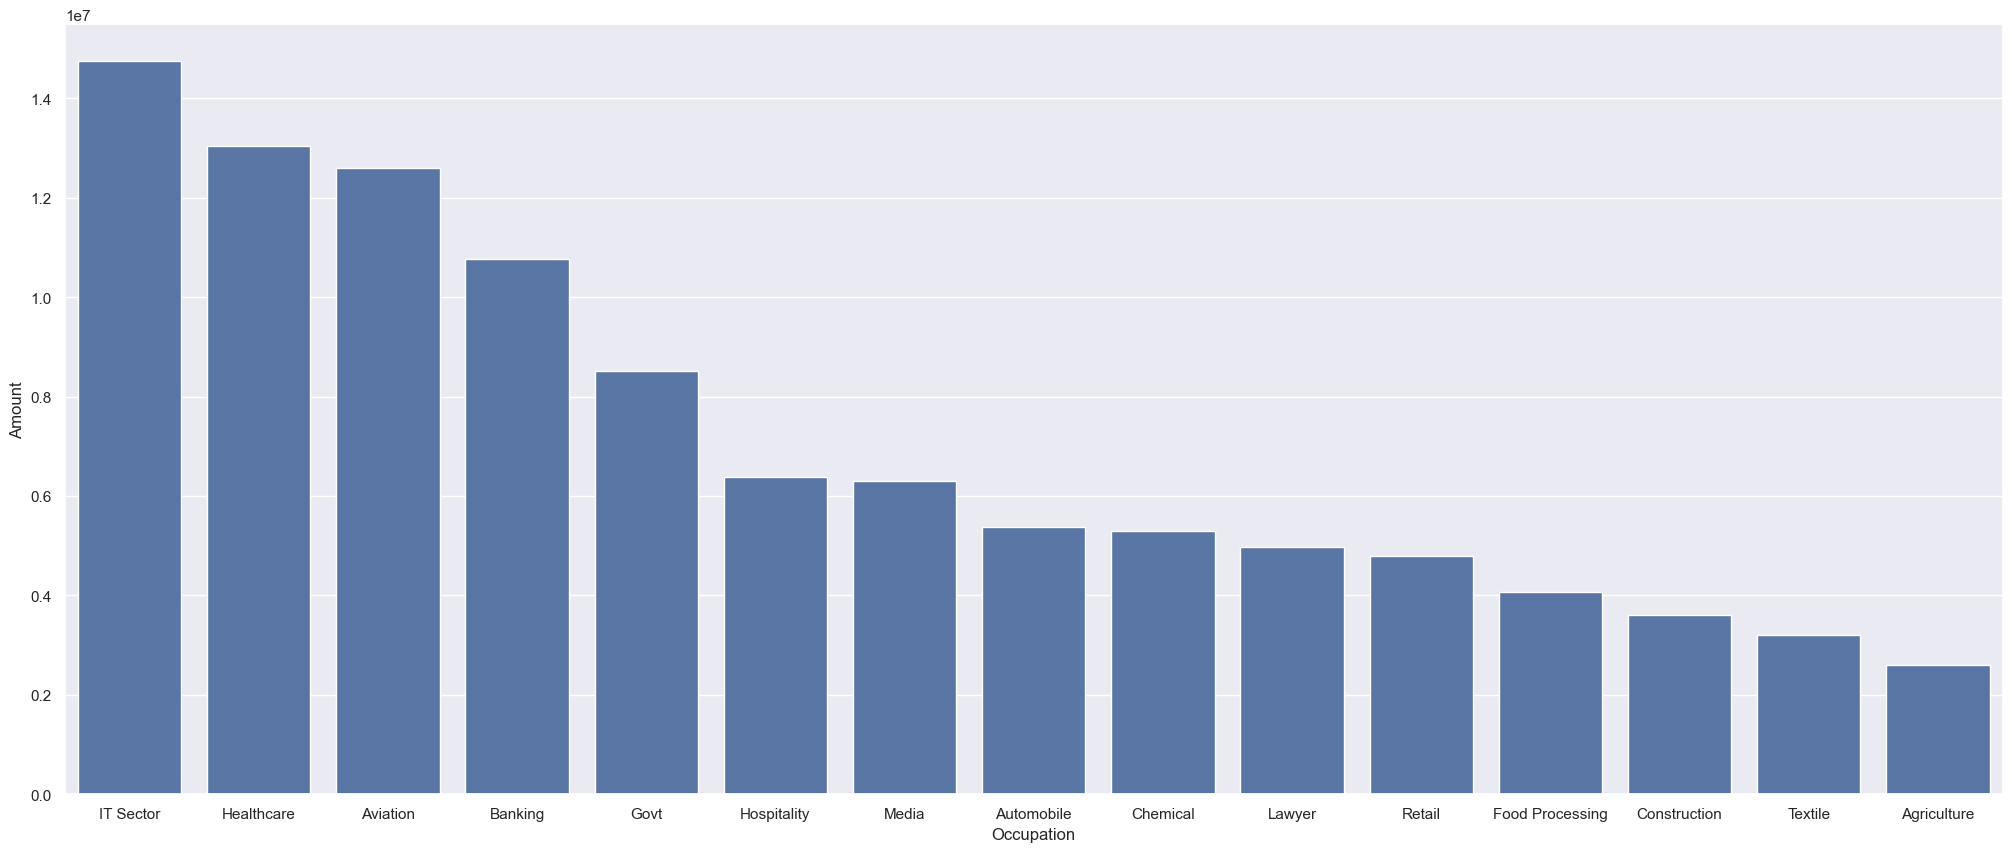

In [67]:
sns.barplot(data=sales, x="Occupation", y="Amount")

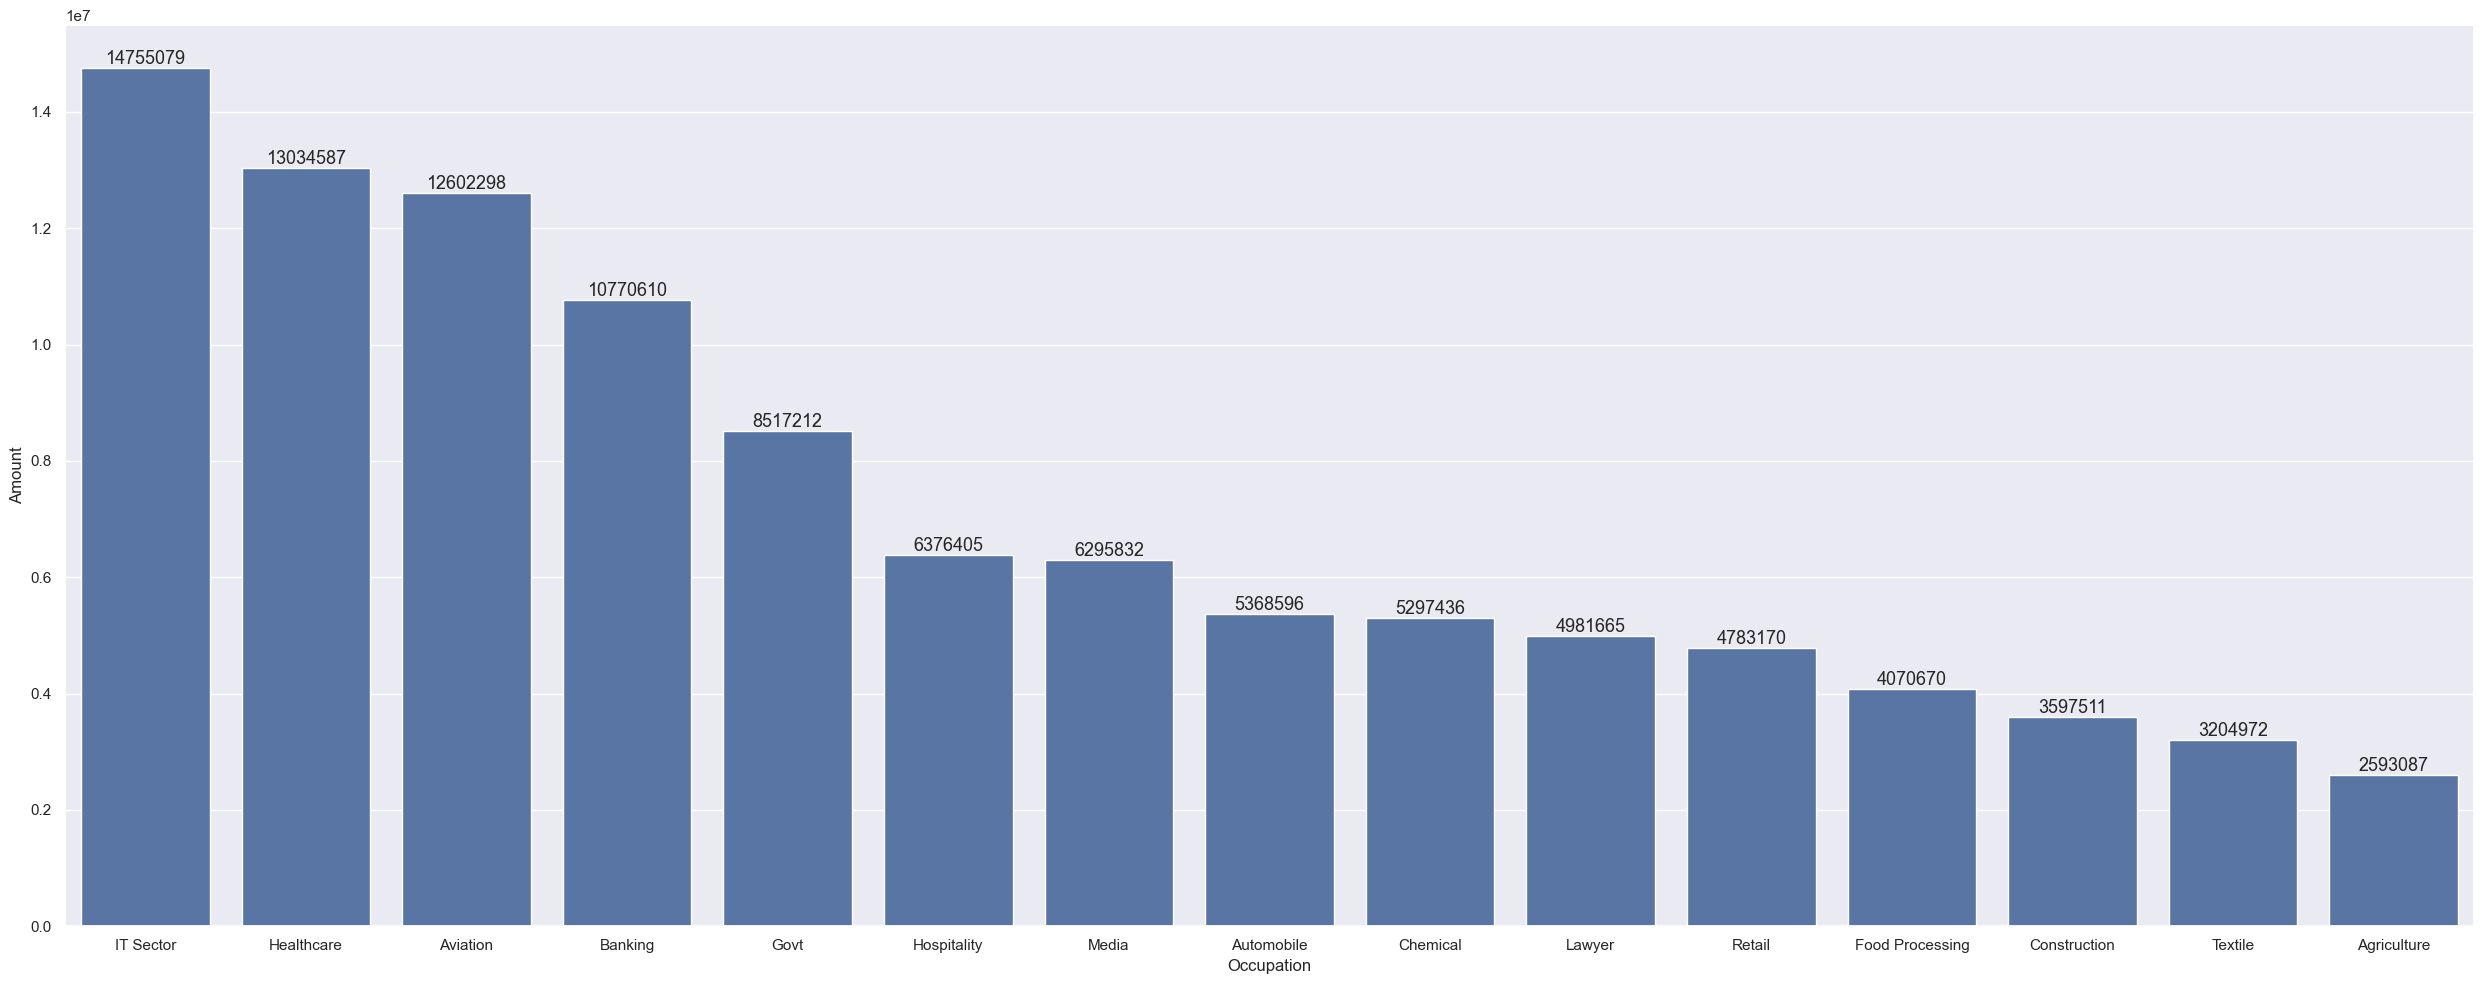

In [73]:
graph=sns.barplot(data=sales, x="Occupation", y="Amount")
for bar in graph.patches:
    count=int(bar.get_height())
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    graph.text(x,y,count,ha="center", va="bottom", fontsize=13)
plt.tight_layout()
plt.show()
